# Predicting Boston Housing Prices

In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

# 1. Importing the Library

In [1]:
#Importing the necessary packages to process or plot the data
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns # used for plot interactive graph

# 2. Loading the Dataset

In [2]:
#Importing the Dataset from the Sklearn
boston_data=datasets.load_boston()
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
#Target Value
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
#Keys present in the Dataset
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
#Creating the Dataframe from the dataset
'''Features that are present in the Dataset'''
data=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data['target']=boston_data.target
prices = pd.Series(boston_data.target)

# 3. What is the Structure of the DataFrame?

In [7]:
#Calling the .shape function to get the shape of the dataset
data.shape

(506, 14)

In [8]:
#Calling the describe function
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Missing or Null Points

In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [10]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

However, there are no missing values in this dataset as shown above.

# 4. Exploration of the Dataset

For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since numpy has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:

 * Calculate the minimum, maximum, mean, median, and standard deviation of 'MEDV', which is stored in prices.
Store each calculation in their respective variable.
 * Store each calculation in their respective variable.

In [11]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)
# Alternative using pandas
# minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: $",minimum_price)
print("Maximum price: $",maximum_price)
print("Mean price: $",mean_price)
print("Median price $",median_price)
print("Standard deviation of prices: $",std_price)
print("First quartile of prices: $",first_quartile)
print("Second quartile of prices: $",third_quartile)
print("Interquartile (IQR) of prices: $",inter_quartile)

Statistics for Boston housing dataset:

Minimum price: $ 5.0
Maximum price: $ 50.0
Mean price: $ 22.532806324110698
Median price $ 21.2
Standard deviation of prices: $ 9.188011545278206
First quartile of prices: $ 17.025
Second quartile of prices: $ 25.0
Interquartile (IQR) of prices: $ 7.975000000000001


 In this section, we will use some visualizations to understand the relationship of the target variable with other features.

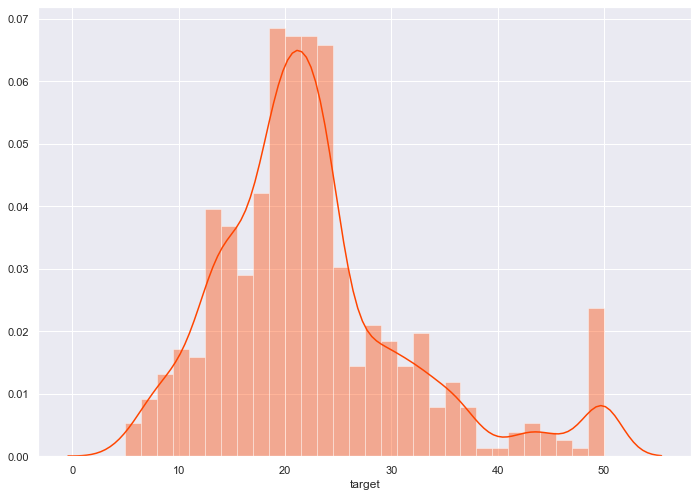

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['target'], bins=30,color='orangered')
plt.show()

In [13]:
print(data[data['target']==50].shape)
data[data['target']==50]

(16, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.

In [14]:
#So after doing this processing
data=data[data['target']!=50]
prices=data['target']

In [15]:
#New shape of the Dataset
data.shape

(490, 14)

## Now we will examine the correlation of the features

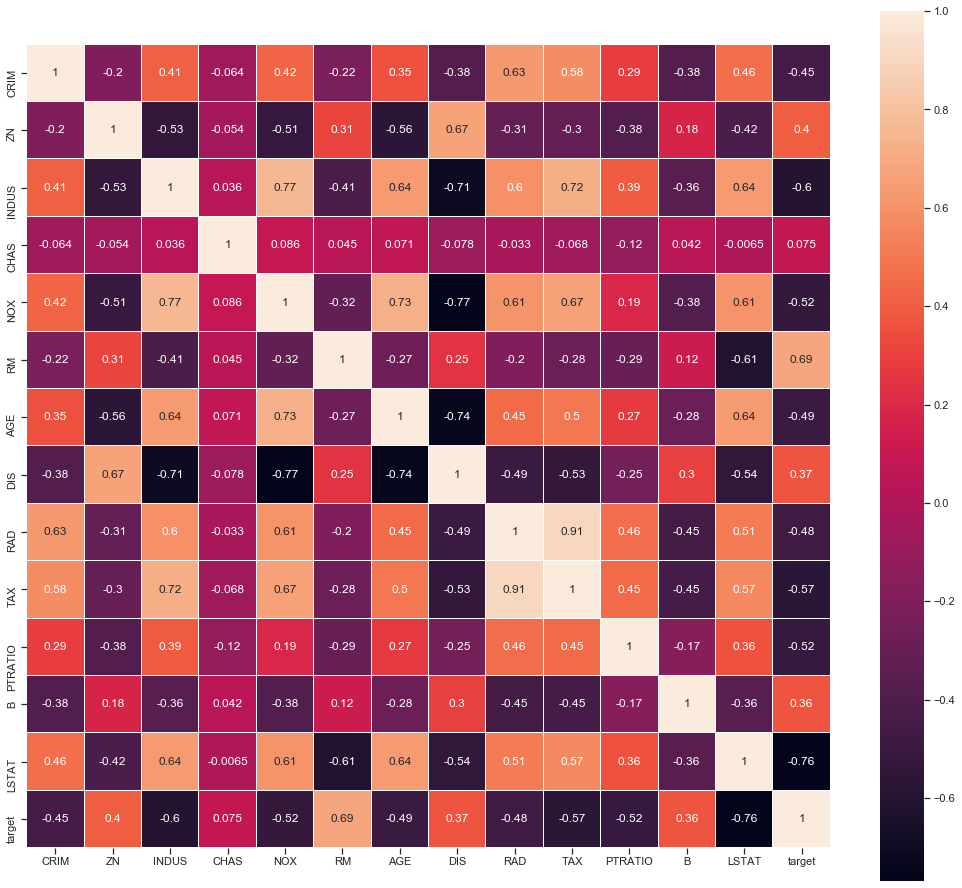

In [16]:
#Using the seaborn library for the heat map
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(18, 16))
sns.heatmap(data.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True)
plt.show()

A heat map uses a warm-to-cool color spectrum to show dataset analytics, namely which parts of data receive the most attention.

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

**Is there any relations among the features?**

 * To fit a linear regression model, we select those features which have a high correlation with our target variable "target". By looking at the correlation matrix we can see that RM has a strong positive correlation with "target" (0.7) where as LSTAT has a high negative correlation with "target"(-0.74).

* An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

**Based on above observations we are only going to take top or best correlated features in the Dataframe,i.e 'RM', 'LSTAT', 'PTRATIO'. The remaining non-relevant features have been excluded.**

In [17]:
#Creating the new Dataframe with Decided Features
filter_data=pd.DataFrame(data[['RM','LSTAT','PTRATIO','target']])
filter_data.head()

,RM,LSTAT,PTRATIO,target
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [18]:
#Dataframe without the target Value
features=filter_data.drop('target',axis=1)
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


## Plotting the Graphs for Each Included Features

Here we will use the inbuilt library for plotting the features with the target value.

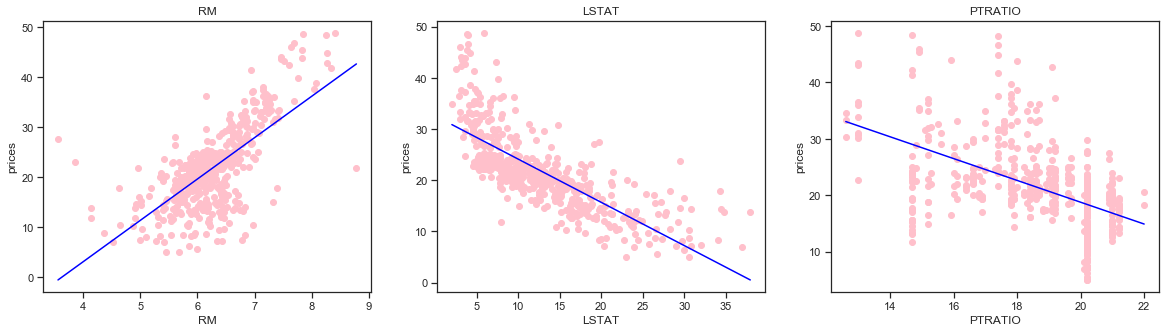

In [19]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = filter_data[col]
    y = prices
    plt.plot(x, y, 'o',color='pink')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='blue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

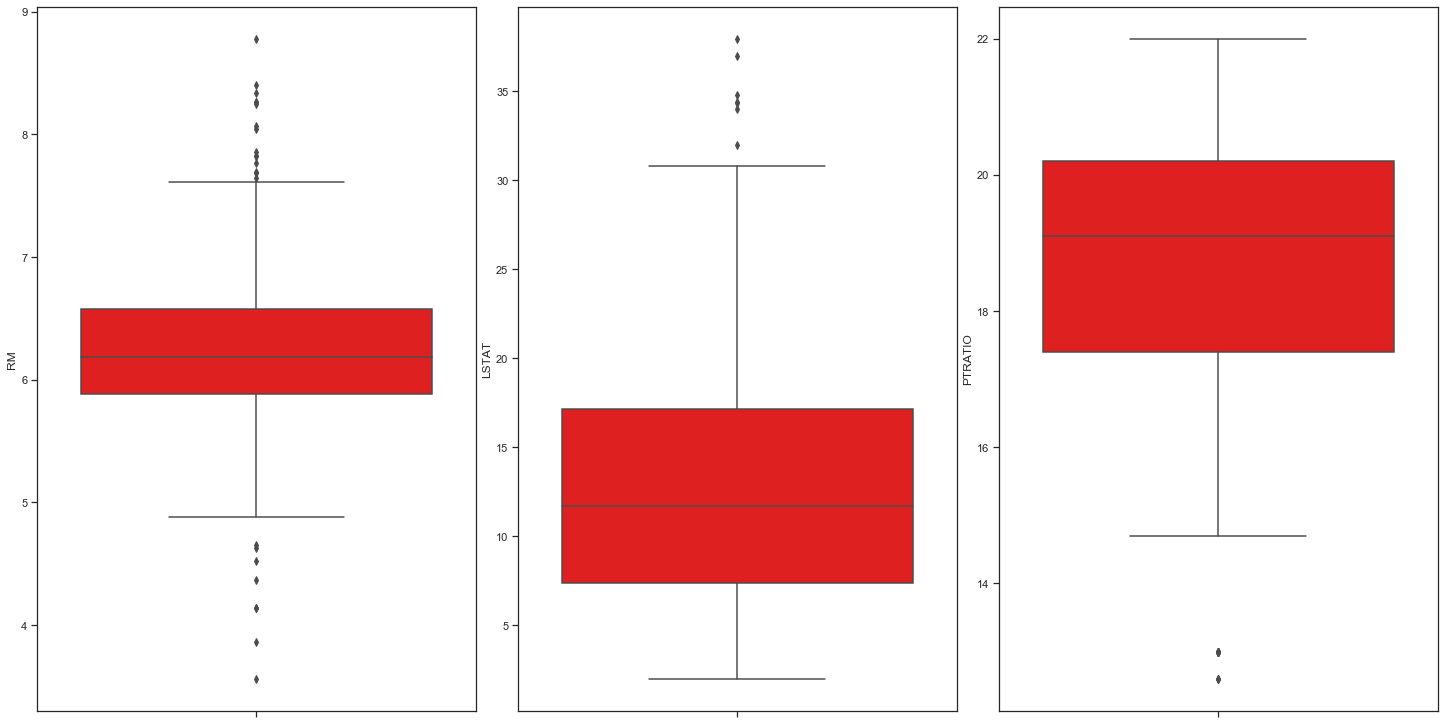

In [20]:
#Using Seaborn for Better Understanding of the Filter_data Features
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in features.items():
    sns.boxplot(y=k, data=features, ax=axs[index],color='red')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Features Observation Outcomes**

* 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.

1. RM

    * For a higher RM, one would expect to observe a higher MEDV.
    
    * This is because more rooms would imply more space, thereby costing more, taking all other factors constant.

2. LSTAT
    
    * For a higher LSTAT, one would expect to observe a a lower MEDV.
    * The social milieux in an area dominated by "lower class" citizens may not be conducive for young children. It may also be       relatively unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens       would lower demand, hence lower prices.

3. PTRATIO

    * For a higher LSTAT, one would expect to observe a lower MEDV.
    
    * This is because there would be a lower teacher-to-student ratio resulting in less attention dedicated to each student           that may impair their performance in school. Typically this is the scenario in public/state schools compared to private         schools. And the prices of houses around public schools are generally lower than those around private schools. Hence one       would expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas

In [21]:
#Applying the above change
filter_data=filter_data[filter_data['RM']!=8.78]

In [22]:
#Making the Required changes for other variables
features=filter_data.drop('target',axis=1)
prices=filter_data['target']

In [23]:
#Checking the shape of the dataframe
filter_data.shape,features.shape,prices.shape

((489, 4), (489, 3), (489,))

# 5. Model Development for Prediction

In this section, we are going to develop Machine learning Inbuilt Regression Model for the Prediction of the price of the House.

## Splitting the Dataframe into test and train

Take the Boston housing dataset and split the data into training and testing subsets.

Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.
We will split the dataset into **80% for Training of the Model**, and **20% for the Testing**.

Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.

In [24]:
x_train,x_test,y_train,y_test=train_test_split(features,prices,random_state=0,test_size=0.2)

In [25]:
#Print the shape of training set and testing state
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((391, 3), (391,), (98, 3), (98,))

## Regression Models

We use scikit-learn’s LinearRegression , LassoRegression and RandomForest Regression to train our model on both the training and test sets.

### Importing the LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
#Calling the LinearRegression and saving it in object
reg_1=LinearRegression()
reg_1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Train the Dataset on LinearRegression**

In [28]:
#Inbuilt .fit function is used for the training
reg_1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicton with LinearRegression**

In [29]:
#Inbuilt .predict function is used for prediction
y_linearRegression=reg_1.predict(x_test)

**Plotting the graph**

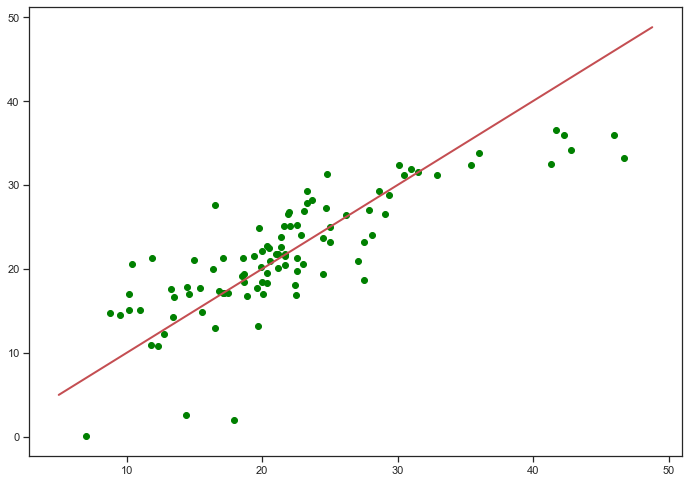

In [30]:
'''Here we are plotting the Graph with the result that we are having and with the result that we get from Model.'''
plt.scatter(y_test, y_linearRegression,color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', lw=2)
plt.show()

**Model Evaluation**

We will evaluate our model using RMSE and R2-score.

In [31]:
# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test,y_linearRegression)))
r2 = reg_1.score(x_test,y_test)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.69657596125396
R2 score is 0.6574622113312864


### Importing the LassoRegression

In [32]:
from sklearn.linear_model import Lasso

In [33]:
#Calling the LinearRegression and saving it in object
reg_2=Lasso()
reg_2

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

**Training the Dataset on LassoRegression**

In [34]:
#Inbuilt .fit function is used for the training
reg_2.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

**Predicton with LassoRegression**

In [35]:
#Inbuilt .predict function is used for prediction
y_lassoRegression=reg_2.predict(x_test)

**Plotting the graph**

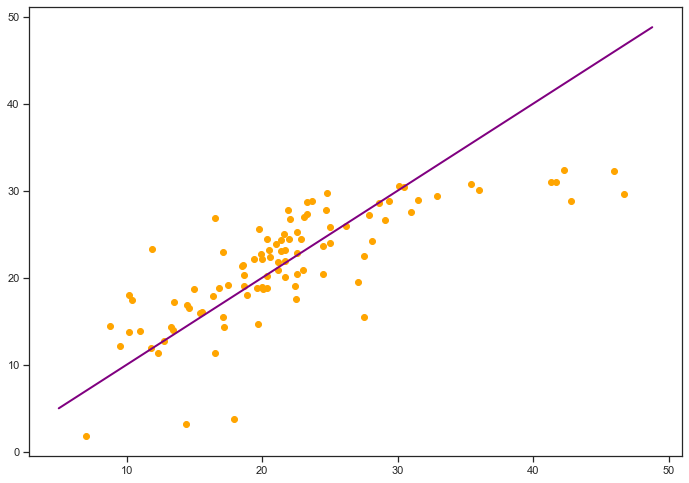

In [36]:
'''Here we are plotting the Graph with the result that we are having and with the result that we get from Model.'''
plt.scatter(y_test, y_lassoRegression,color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='purple', lw=2)
plt.show()

**Model Evaluation**

We will evaluate our model using RMSE and R2-score.

In [37]:
# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test,y_lassoRegression)))
r2 = reg_2.score(x_test, y_test)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.185530592283782
R2 score is 0.5824272118160347


### Importing the RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [39]:
#Calling the LinearRegression and saving it in object
reg_3 = RandomForestRegressor(max_depth=2, random_state=0)

**Training the Dataset on RandomForestRegressor**

In [40]:
#Inbuilt .fit function is used for the training
reg_3.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

**Predicton with RandomForestRegressor**

In [41]:
#Inbuilt .predict function is used for prediction
y_randomForest=reg_3.predict(x_test)

**Plotting the graph**

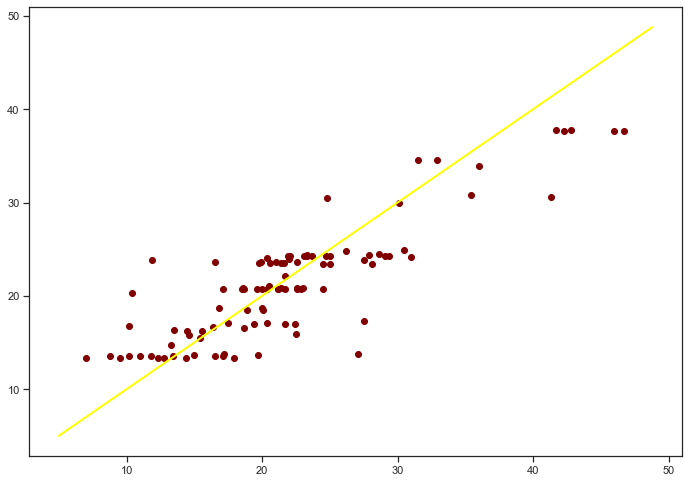

In [42]:
'''Here we are plotting the Graph with the result that we are having and with the result that we get from Model.'''
plt.scatter(y_test, y_randomForest,color='maroon')
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='yellow', lw=2)

**Model Evaluation**

We will evaluate our model R2-score

In [43]:
# model evaluation for testing set
r2 = reg_3.score(x_test, y_test)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.7325270677037341


# 6. Conclusion

In this project, we applied the concepts of linear regression,Lasso Regression and RandomForest Regression on the Boston housing dataset. I would recommend to try out other Regression Model also.

**Here we find that Boston Dataset is showing more Accurate Prediction with RandomForest Regression among the three that we have used**

In [46]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu